MNIST 자료 중 3, 5, 6, 7 에 해당되는 자료만을 선택,       
수업시간에 배운 unsupervised learning 방법 중 5 가지를 이용하여
훈련시키고 각 방법의 성능을 비교하시오.       
각 clustering 방법에서는 최적의 parameter 조합을 이용하고 최적
의 k 를 찾아서 훈련시킬 것             
위의 결과와 자료에서 제공되고 있는 label 을 비교 clustering 이 잘
되지 않는 이상점이 몇 개인지를 확인하고 image 그림을 그려 확인
해보시오

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture

In [2]:
# load data
mnist = fetch_openml('mnist_784', version=1) 
data = pd.concat([mnist['data'], pd.DataFrame(mnist['target'])], axis=1)
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [3]:
data['class']=data['class'].astype(int)
data=data[data['class'].isin([3,5,6,7])].reset_index(drop=True)
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [4]:
data['class'].unique()

array([5, 3, 6, 7])

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### k-means
- init = "k-means++", "random" 에 대해 모델 적합 후 정확도가 더 높은 모델을 선택
- n_init=5로 설정하여 5번의 반복중 가장 작은 inertia를 갖는 모델 선택
- n_cluster=1부터 10까지 증가시킨 모델을 이용하여 scree plot을 그리고 가장 적절한 k를 선택

In [5]:
for a in ["k-means++", "random"]:
    m_kmeans = KMeans(n_clusters=4, init=a, n_init=10,
                     algorithm="full", random_state=777)
    y_pred=m_kmeans.fit_predict(X)
    
    data_w_label = pd.concat([data, 
                              pd.DataFrame(y_pred)], axis=1).rename(columns={0:'label'})
    for n in range(4):
        data_w_label.loc[data_w_label['label']==n,'label']=data_w_label[data_w_label['label']==n]["class"].value_counts().index[0]
    print("accuracy score {} with algorithm={}".format(accuracy_score(y, data_w_label['label']), a))

accuracy score 0.7507149838902364 with algorithm=k-means++
accuracy score 0.5564565760417044 with algorithm=random


두 방법 중 정확도가 더 높은 k-means++ 방법을 선택한다.

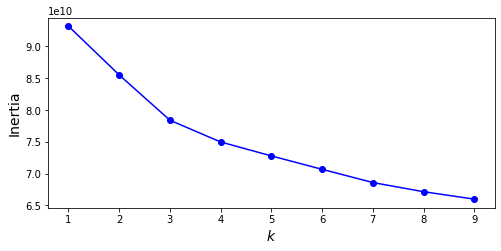

In [6]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=777).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14);

3,4 부근에서 기울기의 변화가 눈에 띄는데, 사용 데이터에서 숫자 구분이 4개이므로 4를 클러스터 개수로 선택한다.

In [31]:
#최종 kmeans 모델
kmeans = KMeans(n_clusters=4,init="k-means++", n_init=10,
                     algorithm="full", random_state=777).fit(X)
y_pred_kmeans=kmeans.predict(X)
preddf_kmeans = pd.concat([data['class'], 
                              pd.DataFrame(y_pred_kmeans)], axis=1).rename(columns={0:'label'})

for n in range(4):
    preddf_kmeans.loc[preddf_kmeans['label']==n,'label']=preddf_kmeans[preddf_kmeans['label']==n]["class"].value_counts().index[0]

print("accuracy score: {}".format(accuracy_score(y, preddf_kmeans['label'])))

accuracy score: 0.7507149838902364


최종적으로 사용한 k-means 모델의 정확도는 75.07%이다.

예측이 잘못된 데이터 이미지 출력해보기

In [48]:
error_label_kmeans=preddf_kmeans[preddf_kmeans['class'] != preddf_kmeans['label']]
error_idx_kmeans=error_label_kmeans.index

error_kmeans=X.iloc[error_idx_kmeans]
error_label_kmeans=error_label_kmeans.reset_index(False)

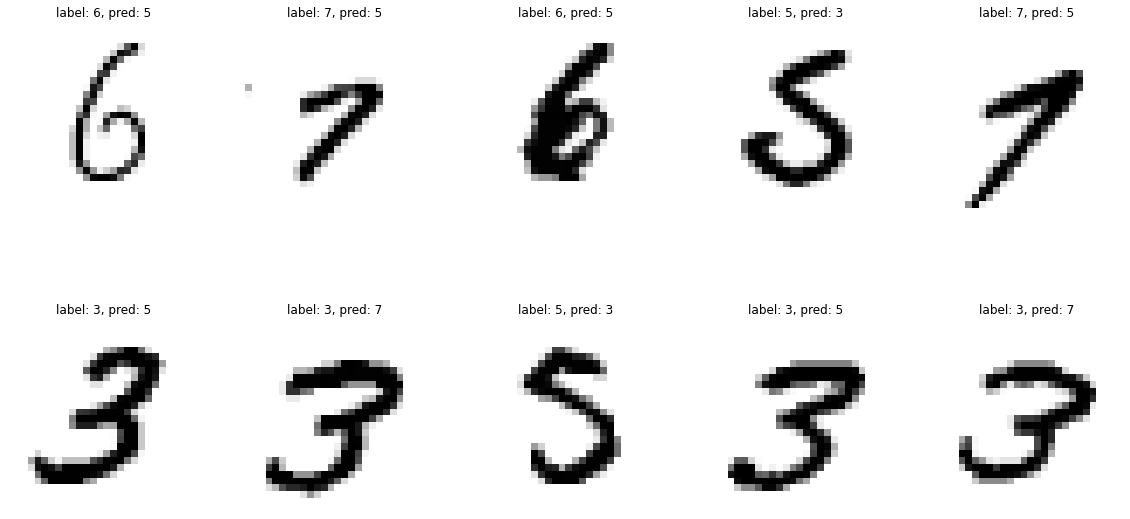

In [50]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    digit = error_kmeans.iloc[i] 
    digit_image = np.array(digit).reshape(28, 28) 
    plt.imshow(digit_image, cmap=mpl.cm.binary) 
    plt.axis("off")
    plt.title("label: "+str(error_label_kmeans['class'][i])+", pred: "+str(error_label_kmeans['label'][i]))

### DBSCAN
- eps, min_samples를 조정한 몇 개의 모델을 만들어보고 가장 성능이 좋은 모델을 선택한다.

In [64]:
for eps in [0.05, 0.2, 0.5]:
    for ms in [3, 5]:
        m_dbscan = DBSCAN(eps=eps, min_samples=ms)
        m_dbscan.fit(X)
        y_pred=m_dbscan.labels_
    
        data_w_label = pd.concat([data, 
                                  pd.DataFrame(y_pred)], axis=1).rename(columns={0:'label'})
        for n in set(m_dbscan.labels_):
            data_w_label.loc[data_w_label['label']==n,'label']=data_w_label[data_w_label['label']==n]["class"].value_counts().index[0]
        print("number of cluster {}, accuracy score {} with eps={}, min_samples={}".format(len(set(m_dbscan.labels_)),accuracy_score(y, data_w_label['label']), eps, ms))

number of cluster 1, accuracy score 0.2640191145060276 with eps=0.05, min_samples=3
number of cluster 1, accuracy score 0.2640191145060276 with eps=0.05, min_samples=5
number of cluster 1, accuracy score 0.2640191145060276 with eps=0.2, min_samples=3
number of cluster 1, accuracy score 0.2640191145060276 with eps=0.2, min_samples=5
number of cluster 1, accuracy score 0.2640191145060276 with eps=0.5, min_samples=3
number of cluster 1, accuracy score 0.2640191145060276 with eps=0.5, min_samples=5


DBSCAN으로 모델링한 경우 모두 하나의 클러스터로만 분류되었다. 같은 클러스터로 묶인 값들 중 가장 많은 클래스를 차지하는 값으로 labeling하므로, 4개의 숫자 중 가장 많은 값인 7로 분류된다. 이때의 정확도는 26.40%이다.      

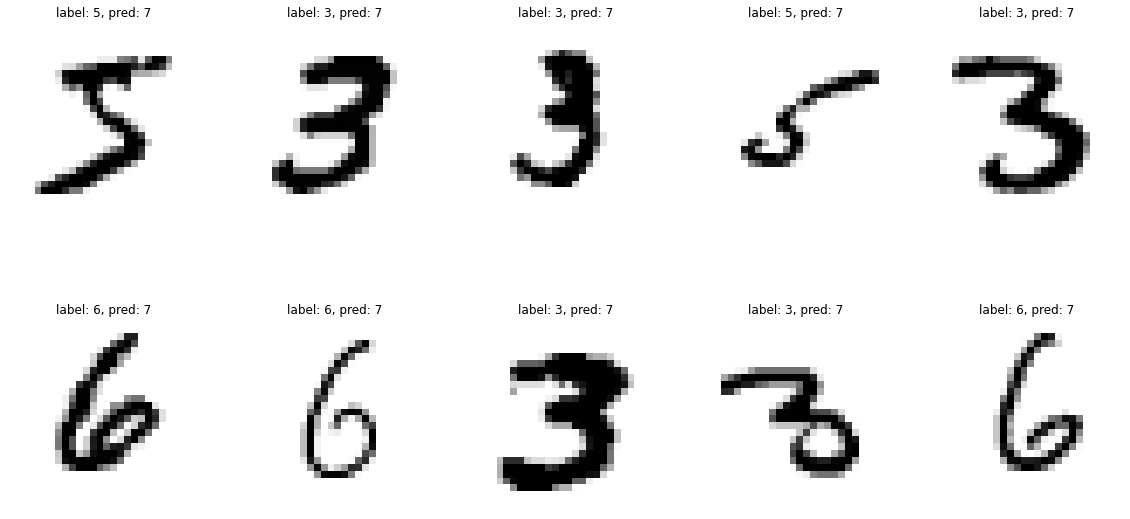

In [10]:
# dbscan 예측
dbscan = DBSCAN(eps=0.05, min_samples=3)
dbscan.fit(X)
y_pred_db=dbscan.labels_
preddf_db = pd.concat([data, 
    pd.DataFrame(y_pred_db)], axis=1).rename(columns={0:'label'})

for n in set(dbscan.labels_):
    preddf_db.loc[preddf_db['label']==n,'label']=preddf_db[preddf_db['label']==n]["class"].value_counts().index[0]

## 실제와 다르게 예측한 값들에 대한 데이터 생성
error_label_db=preddf_db[preddf_db['class'] != preddf_db['label']]
error_idx_db=error_label_db.index

error_db=X.iloc[error_idx_db]
error_label_db=error_label_db.reset_index(False)

plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    digit = error_db.iloc[i] 
    digit_image = np.array(digit).reshape(28, 28) 
    plt.imshow(digit_image, cmap=mpl.cm.binary) 
    plt.axis("off")
    plt.title("label: "+str(error_label_db['class'][i])+", pred: "+str(error_label_db['label'][i]))

### Agglomerate clustering
클러스터 개수와 linkage를 조정하여 모델을 적합해보고 가장 정확도가 높은 모델을 선택한다.

In [16]:
for linkage in ['ward', 'average', 'single']:
    for n_cluster in [3,4,5]:
        m_ac = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        m_ac.fit(X)
        y_pred=m_ac.labels_
    
        data_w_label = pd.concat([data, 
                                    pd.DataFrame(y_pred)], axis=1).rename(columns={0:'label'})
    
        for n in range(n_cluster):
            data_w_label.loc[data_w_label['label']==n,'label']=data_w_label[data_w_label['label']==n]["class"].value_counts().index[0]
        print("accuracy score {} with linkage={}, number of cluster={}".format(accuracy_score(y, data_w_label['label']), linkage, n_cluster))

accuracy score 0.7646164428193897 with linkage=ward, number of cluster=3
accuracy score 0.7646164428193897 with linkage=ward, number of cluster=4
accuracy score 0.7646164428193897 with linkage=ward, number of cluster=5
accuracy score 0.26528617456467435 with linkage=average, number of cluster=3
accuracy score 0.265358577996597 with linkage=average, number of cluster=4
accuracy score 0.268254715273504 with linkage=average, number of cluster=5
accuracy score 0.26409151793795027 with linkage=single, number of cluster=3
accuracy score 0.26409151793795027 with linkage=single, number of cluster=4
accuracy score 0.2641277196539116 with linkage=single, number of cluster=5


적합한 모델들 중 linkage를 ward를 설정했을 때가 정확도 76.46%로 가장 높았다.     
세개의 클러스터 개수에서 모두 같은 결과를 보였으므로, original data의 레이블 개수인 4개를 클러스터 개수로 지정하여 모델 적합 및 예측을 진행한다.

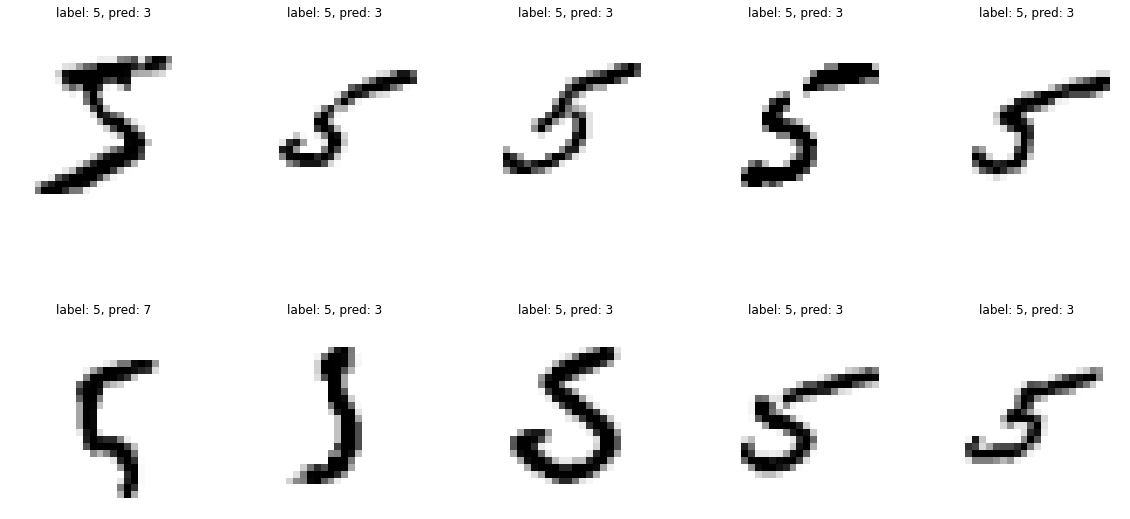

In [17]:
# spectral clustering 예측
ac = AgglomerativeClustering(n_clusters=4, linkage="ward")
ac.fit(X)
y_pred_ac=ac.labels_
preddf_ac = pd.concat([data, 
    pd.DataFrame(y_pred_ac)], axis=1).rename(columns={0:'label'})

for n in set(ac.labels_):
    preddf_ac.loc[preddf_ac['label']==n,'label']=preddf_ac[preddf_ac['label']==n]["class"].value_counts().index[0]

## 실제와 다르게 예측한 값들에 대한 데이터 생성
error_label_ac=preddf_ac[preddf_ac['class'] != preddf_ac['label']]
error_idx_ac=error_label_ac.index

error_ac=X.iloc[error_idx_ac]
error_label_ac=error_label_ac.reset_index(False)

plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    digit = error_ac.iloc[i] 
    digit_image = np.array(digit).reshape(28, 28) 
    plt.imshow(digit_image, cmap=mpl.cm.binary) 
    plt.axis("off")
    plt.title("label: "+str(error_label_ac['class'][i])+", pred: "+str(error_label_ac['label'][i]))

### Spectral Clustering
gamma와 클러스터 개수를 조정하여 모델을 적합해보고 가장 정확도가 높은 모델을 선택한다.

In [17]:
for gamma in [1, 10, 100]:
    for n_cluster in [3,4,5]:
        m_sc = SpectralClustering(n_clusters=n_cluster, gamma=gamma, random_state=777)
        m_sc.fit(X)
        y_pred=m_sc.labels_
    
        data_w_label = pd.concat([data, 
                                    pd.DataFrame(y_pred)], axis=1).rename(columns={0:'label'})
    
        for n in range(n_cluster):
            data_w_label.loc[data_w_label['label']==n,'label']=data_w_label[data_w_label['label']==n]["class"].value_counts().index[0]
        print("accuracy score {} with gamma={}, number of cluster={}".format(accuracy_score(y, data_w_label['label']), gamma, n_cluster))

C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


accuracy score 0.2648879556890997 with gamma=1, number of cluster=3


C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


accuracy score 0.26427252651775696 with gamma=1, number of cluster=4


C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


accuracy score 0.2656481917242877 with gamma=1, number of cluster=5


C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


accuracy score 0.26416392136987293 with gamma=10, number of cluster=3


C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


accuracy score 0.2640191145060276 with gamma=10, number of cluster=4


C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


accuracy score 0.2656843934402491 with gamma=10, number of cluster=5


C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


accuracy score 0.2640191145060276 with gamma=100, number of cluster=3


C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


accuracy score 0.2640191145060276 with gamma=100, number of cluster=4


C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


accuracy score 0.26557578829236506 with gamma=100, number of cluster=5


적합한 모델들 중 gamma가 10이고 클러스터 개수가 5개일 때 정확도가 0.2659로 가장 높았다.

C:\Users\YJ-HWANG\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


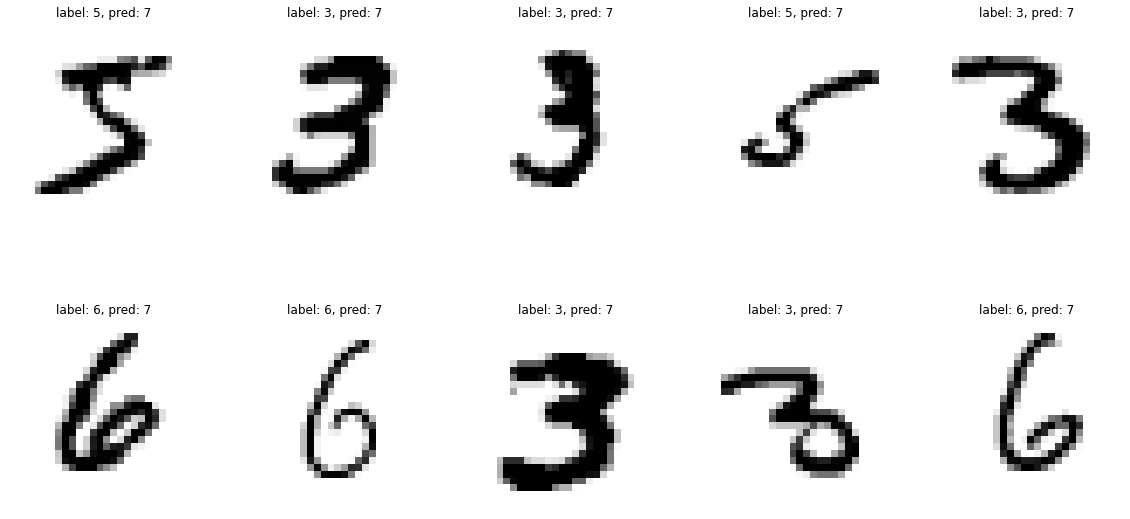

In [18]:
# spectral clustering 예측
sc = SpectralClustering(n_clusters=5, gamma=10, random_state=777)
sc.fit(X)
y_pred_sc=sc.labels_
preddf_sc = pd.concat([data, 
    pd.DataFrame(y_pred_sc)], axis=1).rename(columns={0:'label'})

for n in set(sc.labels_):
    preddf_sc.loc[preddf_sc['label']==n,'label']=preddf_sc[preddf_sc['label']==n]["class"].value_counts().index[0]

## 실제와 다르게 예측한 값들에 대한 데이터 생성
error_label_sc=preddf_sc[preddf_sc['class'] != preddf_sc['label']]
error_idx_sc=error_label_sc.index

error_sc=X.iloc[error_idx_sc]
error_label_sc=error_label_sc.reset_index(False)

plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    digit = error_sc.iloc[i] 
    digit_image = np.array(digit).reshape(28, 28) 
    plt.imshow(digit_image, cmap=mpl.cm.binary) 
    plt.axis("off")
    plt.title("label: "+str(error_label_sc['class'][i])+", pred: "+str(error_label_sc['label'][i]))

### Gaussian Mixture Model
covariance type을 full, tied, spherical, diag로 각각 설정하고, 클러스터 개수를 3,4,5개로 설정하여 각각 모델을 적합한 후 가장 정확도가 높은 모델을 선택한다.

In [27]:
for ct in ["full", "tied", "spherical", "diag"]:
    for n_cluster in [3,4,5]:
        m_gmm = GaussianMixture(n_components=n_cluster, n_init=5,
                                covariance_type=ct, random_state=777)
        y_pred=m_gmm.fit_predict(X)        
    
        data_w_label = pd.concat([data, 
                                    pd.DataFrame(y_pred)], axis=1).rename(columns={0:'label'})
    
        for n in range(n_cluster):
            data_w_label.loc[data_w_label['label']==n,'label']=data_w_label[data_w_label['label']==n]["class"].value_counts().index[0]
        print("accuracy score {} with covariance type={}, number of cluster={}".format(accuracy_score(y, data_w_label['label']), ct, n_cluster))

accuracy score 0.6250950295043985 with covariance type=full, number of cluster=3
accuracy score 0.570937262426239 with covariance type=full, number of cluster=4
accuracy score 0.533178872678565 with covariance type=full, number of cluster=5
accuracy score 0.697751873438801 with covariance type=tied, number of cluster=3
accuracy score 0.5267711689534084 with covariance type=tied, number of cluster=4
accuracy score 0.507367049198132 with covariance type=tied, number of cluster=5
accuracy score 0.735184447742823 with covariance type=spherical, number of cluster=3
accuracy score 0.5641313398255078 with covariance type=spherical, number of cluster=4
accuracy score 0.5726387430764218 with covariance type=spherical, number of cluster=5
accuracy score 0.6616225609093871 with covariance type=diag, number of cluster=3
accuracy score 0.6759584404300764 with covariance type=diag, number of cluster=4
accuracy score 0.6256018535278572 with covariance type=diag, number of cluster=5


covariance type이 spherical이고 클러스터 개수가 3개인 모델이 정확도가 73.52%로 가장 높았다.

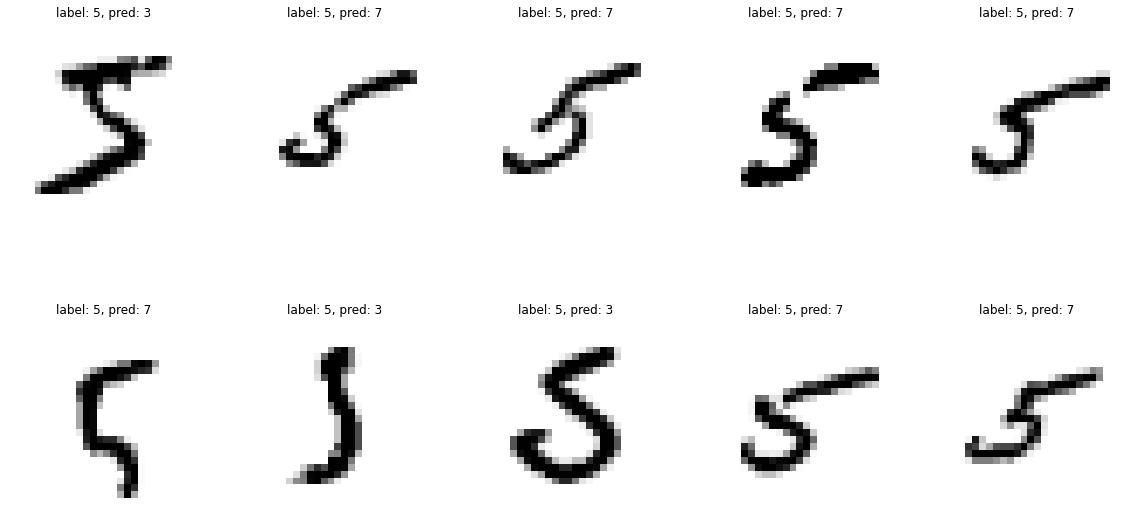

In [13]:
# Gaussian mixture model 예측
gmm = GaussianMixture(n_components=3, n_init=5,
                                covariance_type="spherical", random_state=777)

y_pred_gmm=gmm.fit_predict(X)  
preddf_gmm = pd.concat([data, 
    pd.DataFrame(y_pred_gmm)], axis=1).rename(columns={0:'label'})

for n in set(y_pred_gmm):
    preddf_gmm.loc[preddf_gmm['label']==n,'label']=preddf_gmm[preddf_gmm['label']==n]["class"].value_counts().index[0]

## 실제와 다르게 예측한 값들에 대한 데이터 생성
error_label_gmm=preddf_gmm[preddf_gmm['class'] != preddf_gmm['label']]
error_idx_gmm=error_label_gmm.index

error_gmm=X.iloc[error_idx_gmm]
error_label_gmm=error_label_gmm.reset_index(False)

plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    digit = error_gmm.iloc[i] 
    digit_image = np.array(digit).reshape(28, 28) 
    plt.imshow(digit_image, cmap=mpl.cm.binary) 
    plt.axis("off")
    plt.title("label: "+str(error_label_gmm['class'][i])+", pred: "+str(error_label_gmm['label'][i]))